# Setup

In [1]:
import autosklearn.classification
import sklearn.model_selection
import sklearn.datasets
import sklearn.metrics
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

#### Training Set

In [2]:
ExtPath = '/mnt/e/ucsdmlbc/CommonVoice/archive/'
path = 'AllTrainwithSTD.csv'
df = pd.read_csv(ExtPath + path)
df.drop('Unnamed: 0', inplace = True , axis = 1)

#### Holdout Set

In [3]:
ExtPath = '/mnt/e/ucsdmlbc/CommonVoice/archive/'
tpath = 'AllTestwithSTD.csv'
tdf = pd.read_csv(ExtPath + tpath)
tdf.drop('Unnamed: 0', inplace = True , axis = 1)

## Preview of Data

In [4]:
df.head()

,label,spectral_centroid,spectral_bandwidth,spectral_rolloff,mfcc1,Std1,mfcc2,Std2,mfcc3,Std3,...,mfcc8,Std8,mfcc9,Std9,mfcc10,Std10,mfcc11,Std11,mfcc12,Std12
0,us,2679.939301,3347.669230,5745.486746,979.1706,245.34569,376.00223,203.67845,21.370316,165.47630,...,6.797319,12.152376,5.969101,5.031898,-2.055150,11.456238,-9.238556,23.982313,-36.150772,29.230515
1,us,2859.452074,2576.680219,4912.384969,1362.6725,214.69751,426.51360,262.22190,-55.915200,131.02698,...,15.505822,20.660242,7.190213,6.081736,-18.646480,13.818316,-13.789719,28.595057,-37.100063,41.883660
2,us,1976.264151,1830.634203,3344.655227,1490.3817,255.12636,498.77054,206.11307,-168.789950,168.83821,...,16.935290,17.247293,8.798961,7.622944,-3.454667,12.679749,-8.657740,25.217714,-46.766360,39.332394
3,england,2333.763596,2533.282996,4398.824257,1375.0426,237.40717,400.03485,255.08675,66.706030,111.51125,...,14.405625,20.290690,3.268910,6.785762,-6.033383,10.732883,-17.848553,31.696130,-18.436834,33.804314
4,australia,2351.920593,2974.752407,4743.105301,1674.0428,199.60262,530.80383,188.77255,25.876215,102.23092,...,-14.115968,20.496675,-3.055072,6.256124,6.943354,10.071516,2.013073,18.610756,0.343027,34.820515


# Test out a number of models and return the best one

Use autosklearn to test a number of models and return the best one. AutoSklearn will tune hyperparameters, select the best scoring function and perform 10 fold cross-validation.

In [5]:
X_train, X_test, y_train, y_test = \
    sklearn.model_selection.train_test_split(df.drop('label',axis = 1), df.label, random_state=1)
automl = autosklearn.classification.AutoSklearnClassifier(
    time_left_for_this_task=1800,
    per_run_time_limit = 300,
    ensemble_kwargs={"ensemble_size": 1},
    resampling_strategy='cv', 
    resampling_strategy_arguments={'folds': 10},
    include={"feature_preprocessor": ["pca"]},
    n_jobs = -1)
automl.fit(X_train, y_train)
y_hat = automl.predict(X_test)

[WARNING] [2022-11-20 12:00:53,669:Client-AutoMLSMBO(1)::a6b27bd6-6905-11ed-8162-00155da1118a] Configuration 173 not found
[WARNING] [2022-11-20 12:00:53,669:Client-AutoMLSMBO(1)::a6b27bd6-6905-11ed-8162-00155da1118a] Configuration 88 not found
[WARNING] [2022-11-20 12:00:53,669:Client-AutoMLSMBO(1)::a6b27bd6-6905-11ed-8162-00155da1118a] Configuration 277 not found
[WARNING] [2022-11-20 12:00:53,669:Client-AutoMLSMBO(1)::a6b27bd6-6905-11ed-8162-00155da1118a] Configuration 193 not found
[WARNING] [2022-11-20 12:00:53,669:Client-AutoMLSMBO(1)::a6b27bd6-6905-11ed-8162-00155da1118a] Configuration 99 not found
[WARNING] [2022-11-20 12:00:53,669:Client-AutoMLSMBO(1)::a6b27bd6-6905-11ed-8162-00155da1118a] Configuration 608 not found
[WARNING] [2022-11-20 12:00:53,669:Client-AutoMLSMBO(1)::a6b27bd6-6905-11ed-8162-00155da1118a] Configuration 595 not found
[WARNING] [2022-11-20 12:00:53,669:Client-AutoMLSMBO(1)::a6b27bd6-6905-11ed-8162-00155da1118a] Configuration 129 not found
[WARNING] [2022-11

In [6]:
print("Accuracy score", sklearn.metrics.accuracy_score(y_test, y_hat))

Accuracy score 0.6959451106440846


### Looking at the results of the single model

In [7]:
print(automl.sprint_statistics())

auto-sklearn results:
  Dataset name: a6b27bd6-6905-11ed-8162-00155da1118a
  Metric: accuracy
  Best validation score: 0.687759
  Number of target algorithm runs: 243
  Number of successful target algorithm runs: 151
  Number of crashed target algorithm runs: 7
  Number of target algorithms that exceeded the time limit: 81
  Number of target algorithms that exceeded the memory limit: 4



The number of algorithms exceeding the time limit suggest that a longer training time could improve the model.

In [8]:
automl.show_models()

{202: {'model_id': 202,
  'rank': 1,
  'cost': 0.31224115550244164,
  'ensemble_weight': 1.0,
  'voting_model': VotingClassifier(estimators=None, voting='soft'),
  'estimators': [{'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice at 0x7fe455191570>,
    'balancing': Balancing(random_state=1),
    'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice at 0x7fe45be1a3e0>,
    'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice at 0x7fe45be19c90>,
    'sklearn_classifier': KNeighborsClassifier(n_neighbors=15, weights='distance')},
   {'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice at 0x7fe4bac46740>,
    'balancing': Balancing(random_state=1),
    'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice at 0x7fe456a79960>,
    'classifier': <autosklearn.pipeline.components

A KNeighborsClassifier with 15 neighbors appears to be the best model to come out of the single model run.

### Run on Hold out Set

In [9]:
f1_score( tdf.label, automl.predict(tdf.drop('label',axis = 1)),average = None)

array([0.50684932, 0.48979592, 0.65666667, 0.61538462, 0.53535354,
       0.7739251 ])

The F1 scores show that the model is much better at identifying a US accent than the others. This could be due to the large imbalance in the dataset.

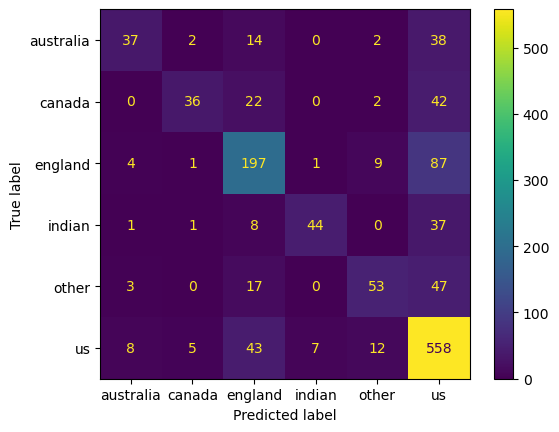

In [10]:
plot_confusion_matrix(automl,tdf.drop('label',axis = 1), tdf.label)  
plt.show()

The confusion matrix shows that the model most commonly incorrectly predicts a US accent and most commonly falsly classifies as a US accent.

In [11]:
automl.score(tdf.drop('label',axis = 1), tdf.label)

0.6913303437967115

The KNN resulting this run has great generalization performing the same on the validation set and holdout set. Some data rebalancing to help with the large number of US samples might help with the model mostly predicting US.

# Test out a number of models and return ensemble

In [12]:
X_train, X_test, y_train, y_test = \
    sklearn.model_selection.train_test_split(df.drop('label',axis = 1), df.label, random_state=1)
automle = autosklearn.classification.AutoSklearnClassifier(
    time_left_for_this_task=1800,
    per_run_time_limit = 300,
    include={"feature_preprocessor": ["pca"]},
    resampling_strategy='cv', 
    resampling_strategy_arguments={'folds': 10},
    n_jobs = -1)
automle.fit(X_train, y_train)
y_hat = automle.predict(X_test)

[WARNING] [2022-11-20 12:31:27,812:Client-AutoMLSMBO(1)::e038adf8-6909-11ed-8162-00155da1118a] Configuration 173 not found
[WARNING] [2022-11-20 12:31:27,812:Client-AutoMLSMBO(1)::e038adf8-6909-11ed-8162-00155da1118a] Configuration 88 not found
[WARNING] [2022-11-20 12:31:27,812:Client-AutoMLSMBO(1)::e038adf8-6909-11ed-8162-00155da1118a] Configuration 277 not found
[WARNING] [2022-11-20 12:31:27,812:Client-AutoMLSMBO(1)::e038adf8-6909-11ed-8162-00155da1118a] Configuration 193 not found
[WARNING] [2022-11-20 12:31:27,812:Client-AutoMLSMBO(1)::e038adf8-6909-11ed-8162-00155da1118a] Configuration 99 not found
[WARNING] [2022-11-20 12:31:27,812:Client-AutoMLSMBO(1)::e038adf8-6909-11ed-8162-00155da1118a] Configuration 608 not found
[WARNING] [2022-11-20 12:31:27,812:Client-AutoMLSMBO(1)::e038adf8-6909-11ed-8162-00155da1118a] Configuration 595 not found
[WARNING] [2022-11-20 12:31:27,812:Client-AutoMLSMBO(1)::e038adf8-6909-11ed-8162-00155da1118a] Configuration 129 not found
[WARNING] [2022-11

In [13]:
print("Accuracy score", sklearn.metrics.accuracy_score(y_test, y_hat))

Accuracy score 0.7570775126715292


### Looking at the results of the ensemble model

In [14]:
print(automle.sprint_statistics())

auto-sklearn results:
  Dataset name: e038adf8-6909-11ed-8162-00155da1118a
  Metric: accuracy
  Best validation score: 0.693013
  Number of target algorithm runs: 245
  Number of successful target algorithm runs: 149
  Number of crashed target algorithm runs: 8
  Number of target algorithms that exceeded the time limit: 83
  Number of target algorithms that exceeded the memory limit: 5



The number of algorithms exceeding the time limit suggest that a longer training time could improve the model.

In [15]:
automle.show_models()

{47: {'model_id': 47,
  'rank': 1,
  'cost': 0.47227659530628646,
  'ensemble_weight': 0.26,
  'voting_model': VotingClassifier(estimators=None, voting='soft'),
  'estimators': [{'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice at 0x7fe453e5a9b0>,
    'balancing': Balancing(random_state=1),
    'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice at 0x7fe45be18790>,
    'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice at 0x7fe45be1b3d0>,
    'sklearn_classifier': QuadraticDiscriminantAnalysis(reg_param=0.45940206784154913)},
   {'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice at 0x7fe451208130>,
    'balancing': Balancing(random_state=1),
    'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice at 0x7fe4b81bf370>,
    'classifier': <autosklearn.pipeline.compone

The print shows all the models in the ensemble, their weight in the ensemble and training parameters.

In [16]:
print(f1_score( tdf.label, automle.predict(tdf.drop('label',axis = 1)),average = None))

[0.68456376 0.65060241 0.74914089 0.7483871  0.62564103 0.81735479]


The F1 scores show that the model is much better at identifying a US accent than the others. This could be due to the large imbalance in the dataset.

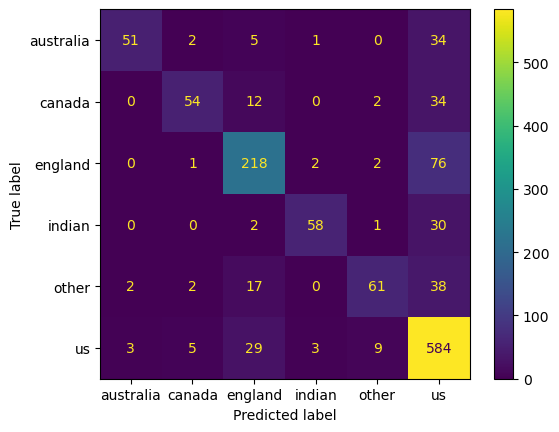

In [17]:
plot_confusion_matrix(automle,tdf.drop('label',axis = 1), tdf.label)  
plt.show()

This confusion matrix makes it clear that the model is looking for a "free lunch" by classifying the majority of inccorrectly predicted accents as US.

In [18]:
automle.score(tdf.drop('label',axis = 1), tdf.label)

0.7668161434977578

The overall accuracy of the model is acceptable but performed worse than the single model.

Overall The ensemble model is more robust as shown in the confusion matrix above and is only slightly less accurate. I would chose the ensemble over the single model run.